# Lexical Simplicity Analysis

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

import sys, os
sys.path.append(os.path.abspath(os.path.join('..', '')))
from reward.simplicity import LexicalSimplicity, shift_to_score
from misc.utils_text import LemmaModel

# Load data
tc = pd.read_csv('../data/textcomplexityde.csv', encoding='cp1252')
ls = pd.read_csv('../data/leichtesprache2.csv', encoding='cp1252', sep=";")

# Load score
lemma_model = LemmaModel(model_path=os.path.abspath(os.path.join('..', './models/morphmodel_ger.pgz')))
lex_simpl = LexicalSimplicity(lemma_model)

Calculate the average Zipf values for *P* and *S* in both datasets

In [9]:
tc_scores = lex_simpl.score(tc['Complex'], tc['Simplification'], printing=True)
ls_scores = lex_simpl.score(ls['Complex'], ls['Simplification'], printing=True)

# of word swaps:  24
[Avg Zipf: 4.323] Added words: [{'w': 'erdanziehungskraft', 'zipf': 1.76}, {'w': 'inhaltslos', 'zipf': 2.31}, {'w': 'moleküle', 'zipf': 3.42}, {'w': 'sprachlich', 'zipf': 3.55}, {'w': 'seife', 'zipf': 3.67}, {'w': 'mischen', 'zipf': 3.9}, {'w': 'schicht', 'zipf': 4.17}, {'w': 'stabil', 'zipf': 4.18}, {'w': 'symbol', 'zipf': 4.3}, {'w': 'dick', 'zipf': 4.41}, {'w': 'dicke', 'zipf': 4.43}, {'w': 'sammeln', 'zipf': 4.47}, {'w': 'ausdruck', 'zipf': 4.53}, {'w': 'befinden', 'zipf': 4.72}, {'w': 'farbe', 'zipf': 4.73}, {'w': 'vorhanden', 'zipf': 4.77}, {'w': 'nennen', 'zipf': 4.91}, {'w': 'klein', 'zipf': 4.94}, {'w': 'wenige', 'zipf': 4.95}, {'w': 'unten', 'zipf': 5.01}, {'w': 'laufen', 'zipf': 5.05}, {'w': 'menge', 'zipf': 5.06}, {'w': 'dadurch', 'zipf': 5.17}, {'w': 'halten', 'zipf': 5.34}]
[Avg Zipf: 2.209] Removed words: [{'w': 'auslaufprozesses', 'zipf': 0.0}, {'w': 'gehaltlos', 'zipf': 0.0}, {'w': 'vanitassymbol', 'zipf': 0.0}, {'w': 'gravitationsbedingt', 'zipf':

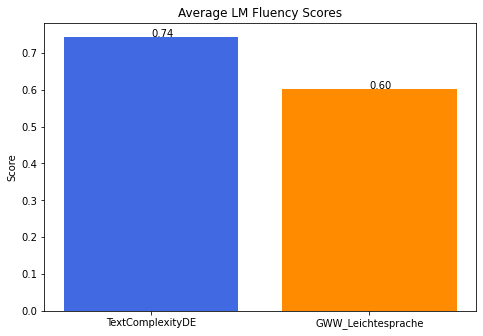

In [8]:
%matplotlib inline
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(0, np.mean(tc_scores), color = 'royalblue', width = 0.8)
ax.bar(1, np.mean(ls_scores), color = 'darkorange', width = 0.8)
ax.set_ylabel('Score')
ax.set_title('Average Lexical Simplicity Scores')
ax.set_xticks([0, 1])
ax.set_xticklabels(["TextComplexityDE", "GWW_Leichtesprache"])

plt.text(0, np.mean(tc_scores), "%.2f" % np.mean(tc_scores))
plt.text(1, np.mean(ls_scores), "%.2f" % np.mean(ls_scores))

plt.show()